# [New York City Taxi Fare Prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction)


### Can you predict a rider's taxi fare?

- __Overview__

In this playground competition, hosted in partnership with Google Cloud and Coursera, \
you are tasked with predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. \
While you can get a basic estimate based on just the distance between the two points, \
this will result in an RMSE of $5-$8, depending on the model used (see the starter code for an example of this approach in Kernels). \
Your challenge is to do better than this using Machine Learning techniques!

To learn how to handle large datasets with ease and solve this problem using TensorFlow, \
consider taking the Machine Learning with TensorFlow on Google Cloud Platform specialization on Coursera \
-- the taxi fare problem is one of several real-world problems that are used as case studies in the series of courses. \
To make this easier, head to Coursera.org/NEXTextended to claim this specialization for free for the first month!

Google Cloud と Coursera とのパートナーシップで開催されているこのプレイグラウンド・コンペティションでは、\
ニューヨーク市でタクシーに乗った場合の運賃（通行料を含む）を、ピックアップ(乗車)とドロップオフ(降車)の場所を指定して予測する課題があります。\
2点間の距離だけで基本的な推定値を得ることができますが、使用するモデルにもよりますが、RMSE(平均二乗誤差)は5から8になります\
（Kernelsでのこのアプローチの例についてはスターターコードを参照してください）。\
あなたの課題は、機械学習のテクニックを使って、これよりも良い結果を出すことです!

大規模なデータセットを簡単に扱い、TensorFlowを使ってこの問題を解決する方法を学ぶには、\
CourseraのMachine Learning with TensorFlow on Google Cloud Platform specializationの受講を検討してください\
-- タクシー料金の問題は、一連のコースでケーススタディとして使用されているいくつかの実世界の問題の1つです。\
これを簡単にするには、Coursera.org/NEXTextendedにアクセスして、最初の1ヶ月間は無料でこのSpecializationを申し込むことができます。

- __Data Description__

__File descriptions__

- train.csv - Input features and target fare_amount values for the training set (about 55M rows).\
特徴量とターゲット(運賃)のトレーニングセット(約5500万行)


- test.csv - Input features for the test set (about 10K rows). Your goal is to predict fare_amount for each row.\
特徴量のテストセット(約1000万行) \
ゴールは各行の運賃を予測することです。


- sample_submission.csv - a sample submission file in the correct format (columns key and fare_amount). \
This file 'predicts' fare_amount to be $11.35 for all rows, which is the mean fare_amount from the training set.\
サンプル提出ファイルのフォーマット(key列, fare_amount運賃列)

__Data fields__


__ID__
- key - Unique string identifying each row in both the training and test sets.  \
Comprised of pickup_datetime plus a unique integer, but this doesn't matter, it should just be used as a unique ID field.\
Required in your submission CSV. Not necessarily needed in the training set,\
but could be useful to simulate a 'submission file' while doing cross-validation within the training set.\
キー - トレーニングセットとテストセットの各行を識別する一意な文字列。\
pickup_datetimeと一意な整数で構成されていますが、これは重要ではなく、一意なIDフィールドとして使用されるべきです。\
投稿CSVで必須。トレーニングセットでは必ずしも必要ではありませんが、トレーニングセット内でクロスバリデーションを行う際に「投稿ファイル」をシミュレートするのに便利です。


__Features__
- pickup_datetime - timestamp value indicating when the taxi ride started.\
乗車時刻 - タクシーの乗車開始時刻を示すtimestamp。


- pickup_longitude - float for longitude coordinate of where the taxi ride started.\
乗車経度 - タクシーの乗車開始地点の経度座標をfloatで指定。


- pickup_latitude - float for latitude coordinate of where the taxi ride started.\
乗車緯度 - タクシーの乗車開始地点の緯度座標をfloatで指定。


- dropoff_longitude - float for longitude coordinate of where the taxi ride ended.\
降車経度 - タクシーの終点の経度座標をfloatで指定。


- dropoff_latitude - float for latitude coordinate of where the taxi ride ended.\
降車緯度 - タクシーの終点の緯度座標をfloatで指定。


- passenger_count - integer indicating the number of passengers in the taxi ride.\
乗客数 - タクシーの乗客数を示すinteger。

__Target__
- fare_amount - float dollar amount of the cost of the taxi ride. \
This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV.\
運賃 - タクシーに乗車時のコストのドル金額をfloatにします。\
この値はトレーニングセットのみで、テストセットで予測する値であり、提出CSVでは必須の値です。

- Notebook

[紹介ノートブック: NYC Taxi Fare Starter Kernel - Simple Linear Model](https://www.kaggle.com/dster/nyc-taxi-fare-starter-kernel-simple-linear-model)

This is a basic Starter Kernel for the New York City Taxi Fare Prediction Playground Competition\
Here we'll use a simple linear model based on the travel vector from the taxi's pickup location to dropoff location which predicts the fare_amount of each ride.

This kernel uses some pandas and mostly numpy for the critical work. There are many higher-level libraries you could use instead, for example sklearn or statsmodels.

これは、ニューヨーク市タクシー料金予測プレイグラウンドコンペティションのための基本的なスターターカーネルです。\
ここでは、タクシーの乗車場所から降車場所までの移動ベクトルに基づいた単純な線形モデルを使用して、各乗車の運賃を予測します。

このカーネルはpandasを幾分使用しており、重要な作業のほとんどにnumpyを使用しています。代わりにsklearnやstatsmodelsのような高レベルのライブラリを使うこともできます。

In [6]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to

#print(os.listdir('../input'))

__Setup training data__\
First let's read in our training data. \
Kernels do not yet support enough memory to load the whole dataset at once, at least using pd.read_csv.\
The entire dataset is about 55M rows, so we're skipping a good portion of the data, but it's certainly possible to build a model using all the data.

まず、トレーニングデータを読み込んでみましょう。\
カーネルはまだデータセット全体を一度に読み込むのに十分なメモリをサポートしていませんが、少なくともpd.read_csvを使用しています。\
データセット全体は約5500万行なので、かなりの部分を読み飛ばしていますが、全てのデータを使ってモデルを構築することは確かに可能です。

In [10]:
train_df =  pd.read_csv('train.csv', nrows = 10_000_000)
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [16]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754


Let's create two new features in our training set representing the "travel vector" between the start and end points of the taxi ride, in both longitude and latitude coordinates. \
We'll take the absolute value since we're only interested in distance traveled.\
Use a helper function since we'll want to do the same thing for the test set later.

学習セットには、タクシーの始点と終点の間の「移動ベクトル」を、経度と緯度の両方の座標で表す2つの新しい特徴量を作成してみましょう。\
ここでは、移動距離のみに関心があるので、絶対値を使用します。\
後でテストセットに同じことをしたいので、ヘルパー関数を使用します。

In [11]:
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the "Manhattan vector" from
# the pickup location to the dropoff location.
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train_df)

Explore and prune outliers
First let's see if there are any NaNs in the dataset.

外れ値を探索して取り除きます。\
まず、データセットにNaNがあるかどうかを見てみましょう。

In [12]:
print(train_df.isnull().sum())

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude     69
dropoff_latitude      69
passenger_count        0
abs_diff_longitude    69
abs_diff_latitude     69
dtype: int64


There are a small amount, so let's remove them from the dataset.

少量なので、データセットから削除してみましょう。

In [13]:
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))

Old size: 10000000
New size: 9999931


Now let's quickly plot a subset of our travel vector features to see its distribution.

では、移動ベクトル特徴量のサブセットをプロットして、その分布を見てみましょう。

<AxesSubplot:xlabel='abs_diff_longitude', ylabel='abs_diff_latitude'>

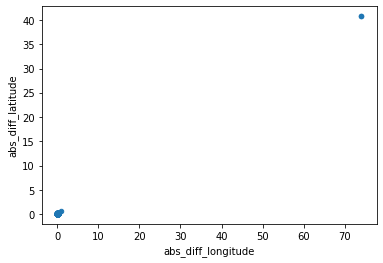

In [15]:
plot = train_df.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')
plot

We expect most of these values to be very small (likely between 0 and 1) since it should all be differences between GPS coordinates within one city. \
For reference, one degree of latitude is about 69 miles.\
However, we can see the dataset has extreme values which do not make sense.\
Let's remove those values from our training set.\
Based on the scatterplot, it looks like we can safely exclude values above 5 (though remember the scatterplot is only showing the first 2000 rows...)

これらの値のほとんどは、1つの都市内でのGPS座標の違いであるため、非常に小さな値（0と1の間の可能性が高い）になると予想しています。\
参考までに、緯度1度は約69マイル(約111キロ)です。\
しかし、このデータセットには意味をなさない極端な値があることがわかります。\
これらの値をトレーニングセットから削除してみましょう。\
散布図を見ると、5以上の値は安全に除外できそうです（ただし、散布図は最初の2000行しか表示されていないことに注意してください...）。

In [17]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.abs_diff_longitude < 5.0) & (train_df.abs_diff_latitude < 5.0)]
print('New size: %d' % len(train_df))

Old size: 9999931
New size: 9979187


__Train our model__\
Our model will take the form  X⋅w=y  where  X  is a matrix of input features, and  y  is a column of the target variable, fare_amount, for each row. \
The weight column  w  is what we will "learn".

First let's setup our input matrix  X  and target column  y  from our training set.\
The matrix  X  should consist of the two GPS coordinate differences, plus a third term of 1 to allow the model to learn a constant bias term.\
The column  y  should consist of the target fare_amount values.

モデルは y = w*X の形式を取り、X は入力特徴量の行列で、y は各行の目標変数 fare_amount の列です。\
重みの列 w は「学習」するものです。

まず、学習セットから入力行列 X と目標変数 y を設定します。\
行列Xは、2つのGPS座標差と、モデルが一定のバイアス項を学習できるようにするための3番目の列 1を加えたものであるべきです。\
y 列は，目標とする fare_amount の値から構成されるべきです．

In [18]:
# Construct and return an Nx3 input matrix for our linear model
# using the travel vector, plus a 1.0 for a constant bias term.
def get_input_matrix(df):
    return np.column_stack((df.abs_diff_longitude, df.abs_diff_latitude, np.ones(len(df))))

train_X = get_input_matrix(train_df)
train_y = np.array(train_df['fare_amount'])

print(train_X.shape)
print(train_y.shape)

(9979187, 3)
(9979187,)


Now let's use numpy's lstsq library function to find the optimal weight column  w .

では、numpy の lstsq ライブラリ関数を使って、最適な重み列 w を求めてみましょう。

In [22]:
# The lstsq function returns several things, and we only care about the actual weight vector w.
(w, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond = None)
print(w)

[147.16176525  76.95503724   6.39545245]


These weights pass a quick sanity check, since we'd expect the first two values -- the weights for the absolute longitude and latitude differences -- to be positive, as more distance should imply a higher fare, and we'd expect the bias term to loosely represent the cost of a very short ride.


Sidenote: we can actually calculate the weight column  w  directly using the Ordinary Least Squares method:  w=(XT⋅X)−1⋅XT⋅y

重みは正当性チェックを簡単に通す。なぜなら、最初の2つの値（絶対経度と緯度の差の重み）は正の値になると予想され、距離が長いほど運賃が高いことを意味し、バイアス項は非常に短い乗車のコストをゆるく表していると予想されるからです。

注：実際には正規方程式を使って重みの列wを直接計算することができます。

In [23]:
w_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_X.T, train_X)), train_X.T), train_y)
print(w_OLS)

[147.16176525  76.95503724   6.39545245]


__Make predictions on the test set__\
Now let's load up our test inputs and predict the fare_amounts for them using our learned weights!

では、テストセットをロードして、学習した重みを使って、それらの入力に対する運賃を予測してみましょう。

In [25]:
test_df = pd.read_csv('test.csv')
test_df.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [26]:
# Reuse the above helper functions to add our features and generate the input matrix.
add_travel_vector_features(test_df)
test_X = get_input_matrix(test_df)
# Predict fare_amount on the test set using our model (w) trained on the training set.
test_y_predictions = np.matmul(test_X, w).round(decimals = 2)

# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

print(os.listdir('.'))

['.DS_Store', 'input', 'test.csv', 'submission.csv', 'GCP-Coupons-Instructions.rtf', 'train.csv', '.ipynb_checkpoints', 'New York City Taxi Fare Prediction.ipynb', 'sample_submission.csv']


__Ideas for Improvement__\
The output here will score an RMSE of $5.74, but you can do better than that! Here are some suggestions:

- Use more columns from the input data. Here we're only using the start/end GPS points from columns [pickup|dropoff]_[latitude|longitude]. Try to see if the other columns -- pickup_datetime and passenger_count -- can help improve your results.


- Use absolute location data rather than relative. Here we're only looking at the difference between the start and end points, but maybe the actual values -- indicating where in NYC the taxi is traveling -- would be useful.


- Use a non-linear model to capture more intricacies within the data.
Try to find more outliers to prune, or construct useful feature crosses.


- Use the entire dataset -- here we're only using about 20% of the training data!

ここでの出力は5.74ドルのRMSEをスコアですが、それ以上のことができます! ここにいくつかの提案があります。

- 入力データからより多くの列を使用します。ここでは、[pickup|dropoff]_[latitude|longitude]列からの開始/終了GPSポイントのみを使用しています。
他の列 -- pickup_datetime と passenger_count -- が結果を改善するのに役立つかどうか試してみてください。


- 相対的な位置データではなく、絶対的な位置データを使用してください。
ここでは開始点と終了点の差だけを見ていますが、実際の値（NYCのどこにタクシーが移動しているかを示す）が役に立つかもしれません。


- 非線形モデルを使用して、データ内のより複雑な部分をキャプチャします。
より多くの外れ値を見つけて剪定したり、有用な特徴のクロスを構築したりしてみてください。


- データセット全体を使用する -- ここでは訓練データの約20%しか使用していない!